In [1]:
%matplotlib inline

from scipy import signal
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os.path as path
import numpy as np
outdir = '/home/eric/Phd_thesis/figures/'
# # # Using seaborn's style
# # plt.style.use('seaborn')

# # width = 345

# nice_fonts = {
#         # Use LaTeX to write all text
#         "text.usetex": True,
#         "font.family": "serif",
#         # Use 10pt font in plots, to match 10pt font in document
#         "axes.labelsize": 10,
#         "font.size": 10,
#         # Make the legend/label fonts a little smaller
#         "legend.fontsize": 8,
#         "xtick.labelsize": 8,
#         "ytick.labelsize": 8,
# }

# mpl.rcParams.update(nice_fonts)
# print("Your style sheets are located at: {}".format(path.join(mpl.__path__[0], 'mpl-data', 'stylelib')))
from my_plot import set_size
from matplotlib import cm
width_pt = 506.45#'thesis'# 
plt.style.use('tex')
output_dir = '/home/eric/Phd_thesis/figures/'

# Symbols and Abbreviations

\nomenclature{$\mathcal{F}\{\cdot\}$}{Fourier transform}

\nomenclature{$\mathcal{F^{-1}}\{\cdot\}$}{Inverse Fourier transform}

\nomenclature{$\sigma$}{Spread of 1-d Gaussian function}

\nomenclature{$\alpha$}{Sharpness (Gabor function major axis)}

\nomenclature{$\beta$}{Sharpness (Gabor function minor axis)}

\nomenclature{$\gamma$}{Sharpness of Gabor filter (major axis)}

\nomenclature{$\eta$}{Sharpness of Gabor filter (minor axis)}

\nomenclature{$\theta$}{Orientation angle of Gabor filter}

\nomenclature{$h(t)$}{1-d signal}

\nomenclature{$h(x,y)$}{2-d signal}

\nomenclature{$\phi$}{Phase shift Gabor filter}

\nomenclature{$g(t)$}{1-d Gabor filter in time domain}

\nomenclature{$g(t; f)$}{1-d Gabor filter in time domain at frequency $f$}

\nomenclature{$g(n)$}{Discrete 1-d Gabor filter in time domain}

\nomenclature{$g(x, y)$}{2-d Gabor filter in spatial domain}

\nomenclature{$g(x, y; f, \theta)$}{2-d Gabor filter in spatial domain t frequency $f$ and angle $\theta$}

\nomenclature{$g^{\ast}(t)$}{Complex conjugate of $g(t)$}

\nomenclature{$g(t){\ast}h(t)$}{Convolution of two 1-d functions in time}

\nomenclature{$\Delta$}{Uncertainty}

\nomenclature{$G(\upsilon)$}{1-d Gabor filter in frequency domain}

\nomenclature{$G(u, v)$}{2-d Gabor filter in frequency domain}

\nomenclature{$f$}{Frequency of Gabor function}

\nomenclature{$\upsilon$}{Frequency}

\nomenclature{$\omega$}{Radial frequency}

\nomenclature{$f_{0}$}{Frequency of Gabor function}

\nomenclature{$j$}{imaginary unit}

\nomenclature{$r(t; f)$}{Response of 1-d Gabor filter}

\nomenclature{$r(x, y; f, \theta)$}{Response of 2-d Gabor filter}

\nomenclature{$t$}{Time}

\nomenclature{$t_{0}$}{Location of Gabor function}

\nomenclature{$x$}{Spatial coordinate}

\nomenclature{$y$}{Spatial coordinate}

\nomenclature{$u$}{Frequency variable}

\nomenclature{$v$}{Frequency variable}

\section{The Gabor's filter as a measurement tool}

In this chapter we present a reminder of signal theory applied to image processing for feature extraction and object detection. First, we show what are the reasons for restricting signal analysis in two predefined domains: time and frequency in one dimension and space and frequency in two dimensions. We especially recall Gabor's filter theory and properties by showing how these filters are related to Heisneberg's uncertainty principle.

\section{Signals in two domains}

In the area of signal and image processing it is well known that there are two alternative methods for describing signals (one-dimensional (1-d) or two-dimensional (2-d)). The first one is to represent the signal as a function of time while the second is to represent the signal as a function of frequency. These two representations are of special interest because we can go from one to the other via the Fourier transform (or the inverse Fourier transform); therefore, these two representations carry the same signal information but in different ways. In this thesis the following Fourier transforms pairs are used

\begin{equation}\label{eq:fourier_transforms_1d}
    \begin{gathered}
        H(\upsilon) = \mathcal{F}\{h(t)\} = \int_{-\infty}^{\infty} h(t) e^{-j2\pi f t} dt \\
        h(t) = \mathcal{F}^{-1}\{H(\upsilon)\} = \int_{-\infty}^{\infty} H(\upsilon) e^{j2\pi f t} df 
    \end{gathered}
\end{equation}

for a 1-d space and 

\begin{equation}\label{eq:fourier_transforms_2d}
    \begin{gathered}
        H(u, v) = \mathcal{F}\{h(x, y)\} = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} h(x, y) e^{-j2\pi (ux + vy)} dx dy \\
        h(x, y) = \mathcal{F}^{-1}\{H(u, v)\} = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty}  H(u, v) e^{j2\pi (ux + vy)} du dv 
    \end{gathered}
\end{equation}

for a 2-d space. Both representations of the signal are somewhat ideal, since the first operates at defined instants of time while the second operates on an infinite series of successive waves at defined frequencies \cite{Gabor:JIEE:1946a}. 

It is evident that the function $h(t)$ is located in both domains, however, it is also well known that no signal with compact support cannot have a finite Fourier transform and vice versa \cite{Bracewell:FourierBook:1999}, there is a certain uncertainty in the time and frequency locations of $h(t)$.

\section{The Heisenberg uncertainty principle }

The uncertainty principle is one of the most famous ideas in quantum mechanics. An early incarnation of the uncertainty principle appeared in a 1927 paper by the German physicist Heisenberg. The uncertainty principle says that we cannot measure the position $(x)$ and the momentum $(p)$ of a particle with absolute precision. The more accurately we know one of these values, the less accurately we know the other. 

However, the uncertainty principle in the field of quantum mechanics is just a particular case of a more general compromise that appears in simple phenomena of everyday life involving waves. The central idea is connected with the interrelation between frequency and duration. For example, in the case of sound waves, if we want to identify the frequency of a musical note, the shorter the sound lasts in time, the less certain we can be about the exact frequency of the sound; to find a more defined frequency, it would be necessary to listen to the sound for a longer time. In the language of signal processing, we can say that a short signal correlates highly with a wide range of frequencies and only wide signals correlate with a short range of frequencies. Formally this is expressed as

\begin{equation}\label{eq:uncertainty_principle_rad}
	\Delta t\Delta \omega \geq \frac{1}{2}
\end{equation}

where $\Delta t$ is the duration of the signal in the time domain and $\Delta \omega$ is the bandwidth of the signal in the frequency domain (CITE). The uncertainty principle then says: the product of the spectral bandwidth multiplied with the time duration of the signal cannot be less than a certain minimum value. Considering the bandwidth of the signal in terms of frequency as $\Delta \upsilon$ where $\omega = 2\pi \upsilon$, the uncertainty principle is stated as 

\begin{equation}\label{eq:uncertainty_principle_freq}
	\Delta t\Delta \upsilon \geq \frac{1}{4\pi}
\end{equation}

The Heisenberg uncertainty principle in the field of signal processing and image processing can be mathematically proved by the \textbf{Parseval's theorem}

\begin{equation}\label{eq:parseval_theorem}
	\int_{-\infty}^{\infty} h(t)^2 dt =  \frac{1}{2 \pi} \int_{-\infty}^{\infty} |H(\omega)|^2 d\omega =  \int_{-\infty}^{\infty} |H(\upsilon)|^2 d\upsilon
\end{equation}

where $h(t)$ is a function and $H(\upsilon)$ its the Fourier transform. 

The \textbf{energy content} of the signal described by $h(t)$ is defined as:

\begin{equation}\label{eq:energy_content_time}
    E_{\infty} \equiv \int_{-\infty}^{\infty}  h(t)^2 dt
\end{equation}


From the Parseval's identity this may be written as:

\begin{equation}\label{eq:energy_content_frequency}
    E_{\infty} =  \int_{-\infty}^{\infty} |H(\upsilon)|^2 d\upsilon
\end{equation}

The \textbf{time dispersion} of the signal is given by

\begin{equation}\label{eq:time_dispersion_no_centered}
    (\Delta t)^2 \equiv \frac{1}{E_{\infty}} \int_{-\infty}^{\infty} (t-t_{0})^2 h(t)^2 dt
\end{equation}

where $t_0$ is the \textbf{center of gravity} of the signal defined by:

\begin{equation}\label{eq:center_of_gravity}
    t_0 \equiv \frac{1}{E_{\infty}} \int_{-\infty}^{\infty} t h(t)^2 dt
\end{equation}

and where if we shift the origin of $t$ so that $t_{0}=0$, then

\begin{equation}\label{eq:time_dispersion}
    (\Delta t)^2 = \frac{1}{E_{\infty}} \int_{-\infty}^{\infty} t^2 h(t)^2 dt
\end{equation}

In an analogous way, the \textbf{spectral bandwidth} of the signal is given by

\begin{equation}\label{eq:spectral_bandwidth_no_centered}
    (\Delta \upsilon)^2 \equiv \frac{1}{E_{\infty}} \int_{-\infty}^{\infty} (\upsilon-f)^2 |H(\upsilon)|^2 d\upsilon
\end{equation}

where $f$ is the \textbf{spectral center of gravity} of the signal defined by:

\begin{equation}\label{eq:spectral_center_of_gravity}
    f \equiv  \frac{2 \pi}{E_{\infty}} \int_{-\infty}^{\infty} f |H(\upsilon)|^2 d\upsilon
\end{equation}

if we consider $f=0$:

\begin{equation}\label{eq:spectral_bandwidth}
    (\Delta \upsilon)^2 = \frac{1}{E_{\infty}} \int_{-\infty}^{\infty} f^2 |H(\upsilon)|^2 d\upsilon 
\end{equation}

If $h'(t)$ is the derivative of the function, its Fourier transform is $j2\pi f H(\upsilon)$. By applying the Parseval's theorem to the Fourier pair $h'(t)\longleftrightarrow j2\pi f H(\upsilon)$ we obtain:

\begin{equation}\label{eq:applyed_parseval_theorem}
    4 \pi^{2} \int_{-\infty}^{\infty} f^2 |H(\upsilon)|^2 d\upsilon =  \int_{-\infty}^{\infty} h'(t)^2 dt
\end{equation}

By substituting in equation $(\eqref{eq:spectral_bandwidth})$, we have:

\begin{equation}\label{eq:spectral_bandwidth2}
    (\Delta \upsilon)^2 = \frac{1}{4 \pi^{2} E_{\infty}} \int_{-\infty}^{\infty} h'(t)^2 dt
\end{equation}

We use equations $(\eqref{eq:time_dispersion})$ and $\eqref{eq:spectral_bandwidth2}$ to calculate:

\begin{equation}\label{eq:time_bandwidth_disp}
    (\Delta t)^2(\Delta \upsilon)^2 = \frac{1}{4 \pi^{2} E_{\infty}^{2}} \int_{-\infty}^{\infty} t^2f(t)^2 dt \int_{-\infty}^{\infty}f'(t)^2 dt
\end{equation}

Applying the Schwartz's inequality for the integrals on the right-hand side of $\eqref{eq:time_bandwidth_disp}$:

\begin{equation}\label{eq:schwartz_inequality}
    \int_{-\infty}^{\infty}t h(t)^2 dt \int_{-\infty}^{\infty}h'(t)^2 dt  \geq \biggr\rvert \int_{-\infty}^{\infty}t h(t)h'(t)^2 dt \biggr\rvert^{2}
\end{equation}

We may integrate by parts the integral on the right-hand side of $\eqref{eq:schwartz_inequality}$

\begin{equation}\label{eq:integr_by_parts}
    \int_{-\infty}^{\infty}t h(t) h'(t)^2 dt =  \frac{1}{2}t h(t)^2 \biggr\rvert_{-\infty}^{\infty} - \frac{1}{2} \int_{-\infty}^{\infty}h(t)^2 dt
\end{equation}

If $\lim_{t\rightarrow \infty} t h(t)^2=0$, the first term on the right-hand side of $\eqref{eq:integr_by_parts}$ vanishes and from equation $\eqref{eq:energy_content_time}$ we have

\begin{equation}\label{eq:energy_content_developped}
    \int_{-\infty}^{\infty} t h(t)h'(t) dt = -\frac{1}{2} E_{\infty}
\end{equation}

If we use this into $\eqref{eq:schwartz_inequality}$ and then into $\eqref{eq:time_bandwidth_disp}$ we obtain:

\begin{equation}\label{eq:uncertainty_principle_freq_square}
   (\Delta t)^2(\Delta \upsilon)^2 \geq \frac{1}{16\pi^{2}} 
\end{equation}

This is the mathematical statement of the uncertainty principle in signal processing.

\section{Gabor filters}

The uncertainty principle shows that time and frequency are two fundamental domains and physically measurable quantities, but still idealizations if one is considered from the other's perspective.
Frequency is a simple waveform in the time domain, but to be sharply defined in the frequency domain it must be infinite in the time domain; a waveform always existed and remains forever. In everyday life it is very difficult to find phenomena with these characteristics, it is more common to find signals that have properties from both domains; certainly they have some frequency characteristics, but they also have a starting point and after some time these signals begin to fade away. This was the motivation of Dennis Gabor to represent signals simultaneously in time and frequency through the Gabor Elementary Function (GEF) \cite{Gabor:JIEE:1946a}. The function represents the minimal quantum of information, that is, it occupies the minimal area, a rectangle, in the time-frequency plane; the minimal amount of simultaneous information in time and frequency.  

The Gabor function is derived form the uncertainty principle, therefore, it has shape for which the product $\Delta t \Delta \upsilon$ assumes the smallest possible value, i.e., for which the inequality in \eqref{eq:uncertainty_principle_freq} turns into an equality ($\Delta t \Delta \upsilon = \frac{1}{4 \pi}$). This is the modulation product of a harmonic oscillation of any frequency with pulse of the form of a probability function \cite{Gabor:JIEE:1946a}

\begin{equation}\label{eq:gabor_function_1d_time}
    g(t) =  e ^{-\alpha^2(t-t_0)^2} e ^{j 2 \pi f t + \phi}
\end{equation}

where $\alpha$ express the \textit{spread} and $t_0$ denotes the centroid of the Gaussian function, $f$ is the frequency of the harmonic oscillations, and $\phi$ defines the phase shift of the oscillation. The representation of the Gabor function in the frequency domain is defined by the Fourier transform of \eqref{eq:gabor_function_1d_time} $G(\upsilon) = \mathcal{F}\{g(t)\}$ and has the analytical form

\begin{equation}\label{eq:gabor_function_1d_freq}
    G(\upsilon) =  \sqrt{\frac{\pi}{\alpha^2}} e ^{-\left(\frac{\pi}{\alpha}\right) ^{2} (\upsilon-f)^2} e ^{-j 2 \pi t_0 (\upsilon-f) + \phi}
\end{equation}

The equations \eqref{eq:gabor_function_1d_time} and \eqref{eq:gabor_function_1d_freq} show straightforward that the center of gravity $t_0$ is equal to \eqref{eq:center_of_gravity} and the spectral center of gravity $f$ is equal to \eqref{eq:spectral_center_of_gravity}, i.e., the Gabor functions follow the Heisenberg's uncertainty principle.  

\subsection{Filter normalization}

The Gabor filter can be more appropriately defined by taking the following justifications. First, we must remember that we use the Gabor function as a linear filter to analyze a signal. Under this condition, the temporal analysis of the signal is carried out using the convolution operator. Considering that the Gabor function is concentrated near the time instant $t_0$ and that a convolution centered at the origin is preferable, then $t_0 = 0$. Another parameter that we can omit is the phase shift $\phi$. There is no evidence that any specific phase would be more beneficial than any other. Moreover, for the functions to be similar at all locations, the phase shift should depend on the location $t_0$, and thus, the phase shift can be removed from the origin centered filter ($\phi$ = 0). The Gabor filter function in its compact form is defined as 

\begin{equation}\label{eq:gabor_function_1d_timefreq_compact}
    \begin{gathered}
         g(t) =  e ^{-\alpha^2 t^2} e ^{j 2 \pi f t } \\
         G(\upsilon) =  \sqrt{\frac{\pi}{\alpha^2}} e ^{-\left(\frac{\pi}{\alpha}\right) ^{2} (\upsilon-f)^2} 
     \end{gathered}
\end{equation}

Knowing that the Gabor filter is a function that is representable in the time and frequency domain, we can normalize it according to the application and following the next conditions \cite{Boukerroui.Noble.ea:JMIV:2004}.

\begin{enumerate}
    \item Maximum condition:
        \begin{equation}\label{eq:maximun_condition}
            \max_t{|G(\upsilon)|} = 1
        \end{equation}
    \item Constant spectra condition:
        \begin{equation}\label{eq:constant_energy_condition}
            \int_{-\infty}^{\infty} |g(t)| dt = 1
        \end{equation}        
\end{enumerate}

From the equation \eqref{eq:gabor_function_1d_freq}, it is evident that the maximum response of the Gabor filter in the frequency domain is a function of $\sqrt{\pi/\alpha^2}$, therefore, its inverse

\begin{equation}\label{eq:normalization_factor}
    \sqrt{\frac{\alpha^2}{\pi}}
\end{equation}

can be used as the Gabor filter normalization factor in the time domain and fulfill the two conditions mentioned above. In summary, the function of the normalized Gabor filter can be defined as

\begin{equation}\label{eq:gabor_function_1d_timefreq_normalized}
    \begin{gathered}
         g(t) =  \sqrt{\frac{\alpha^2}{\pi}} e ^{-\alpha^2 t^2} e ^{j 2 \pi f t } \\
         G(\upsilon) =  e ^{-\left(\frac{\pi}{\alpha}\right) ^2 (\upsilon-f)^2}
     \end{gathered}
\end{equation}

99.95930252922952


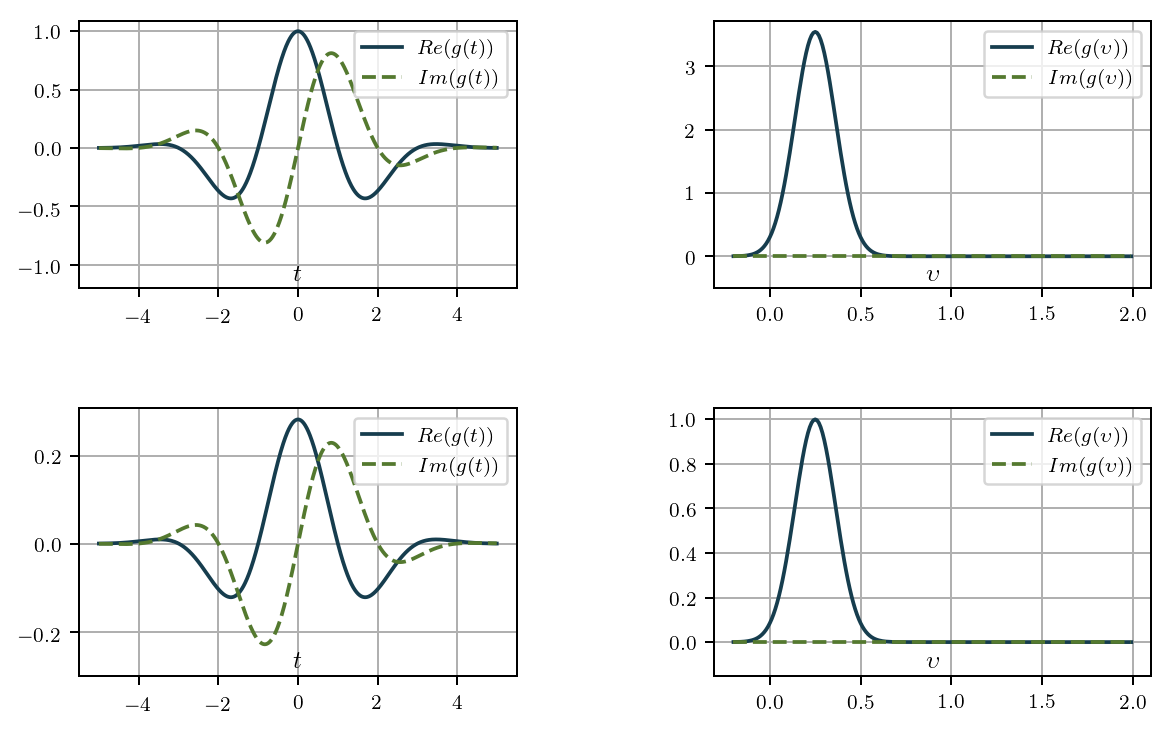

In [2]:
t = np.arange(-5, 5, 0.01)
u = np.arange(-0.2, 2, 0.01)
f = 1/4. 
t_0 = 0.
alpha = 0.5

norm_const = np.sqrt(alpha**2/np.pi)

gauss_t = np.exp(- alpha**2 * (t-t_0) **2)
gt = gauss_t * np.exp(1j* 2 *np.pi * f * t)

gauss_f = np.exp(- (np.pi/alpha)**2 * (u-f)**2)
gf = gauss_f #* np.exp(-1j* 2*np.pi * (u-f) * t_0)
gf *= np.sqrt(np.pi/alpha**2)


gt_norm = gt * norm_const
gf_norm = gf * norm_const

print np.abs(gt_norm).sum()
fig, ax = plt.subplots(2, 2, figsize=set_size(width_pt, subplots=(2, 2)), dpi=180)
        
ax[0, 0].plot(t, gt.real, c=plt.cm.cubehelix(0.2))
ax[0, 0].plot(t, gt.imag, '--', c=plt.cm.cubehelix(0.4))
ax[0, 0].grid()
ax[0, 0].legend((r'$Re(g(t))$', r'$Im(g(t))$'), loc='upper right')
ax[0, 0].set_ylim(-1.2, )
ax[0, 0].set_xlabel(r'$t$', labelpad=-25)

ax[0, 1].plot(u, gf.real, c=plt.cm.cubehelix(0.2))
ax[0, 1].plot(u, gf.imag, '--', c=plt.cm.cubehelix(0.4))
ax[0, 1].grid()
ax[0, 1].legend((r'$Re(g(\upsilon))$', r'$Im(g(\upsilon))$'), loc='upper right')
ax[0, 1].set_ylim(-0.5, )
ax[0, 1].set_xlabel(r'$\upsilon$', labelpad=-25)

ax[1, 0].plot(t, gt_norm.real, c=plt.cm.cubehelix(0.2))
ax[1, 0].plot(t, gt_norm.imag, '--', c=plt.cm.cubehelix(0.4))
ax[1, 0].grid()
ax[1, 0].legend((r'$Re(g(t))$', r'$Im(g(t))$'), loc='upper right')
ax[1, 0].set_ylim(-0.3, )
ax[1, 0].set_xlabel(r'$t$', labelpad=-25)

ax[1, 1].plot(u, gf_norm.real, c=plt.cm.cubehelix(0.2))
ax[1, 1].plot(u, gf_norm.imag, '--', c=plt.cm.cubehelix(0.4))
ax[1, 1].grid()
ax[1, 1].legend((r'$Re(g(\upsilon))$', r'$Im(g(\upsilon))$'), loc='upper right')
ax[1, 1].set_ylim(-0.15, )
ax[1, 1].set_xlabel(r'$\upsilon$', labelpad=-25)
    
fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45, wspace=0.45)
# plt.savefig(outdir + 'GaborFilter_timefreq_1d_norm_efect.pdf', format='pdf', bbox_inches='tight')

\subsection{Filter spacing}

Our main interest in Gabor filters is multispectral analysis of a function. To accomplish this, we can generate a bank containing different Gabor functions that work at different frequencies $f$. We can define the separation of the filters in octaves by means of the half-response spatial frequency bandwidth $B_f$ measured between two center frequencies $f_2 < f_1$ \cite{Granlund:CGIP:1978} belonging to a filter bank such that 

\begin{equation}\label{eq:octave_spacing}
    B_f = \log_2 \left( \frac{f_1}{f_2} \right)
\end{equation}

The octave spacing between two different two different frequencies is an interesting property of the Gabor filters, however, the filters denoted by the equations \eqref{eq:gabor_function_1d_timefreq_normalized} have a spread that only depends on the parameter $\alpha$, regardless of the center frequency $f$. This means that when implementing the Gabor function in a filter bank at different frequencies to obtain a multi-spectral decomposition of a signal, all the filters of the bank will have the same duration. We can see this effect in Figure (FIGURE WITH A BANK OF FILTERS WITH INDEPENDENT SPREAD) where we show a filter bank with an adjacent filter's spacing of one octave, that is, $B_f = 1$. 

52.04998045811607 0.999938316874976
52.04998045811607 0.9997532903278111
52.04998045811607 1.0
52.04998045811607 1.0
52.04998045811607 1.0


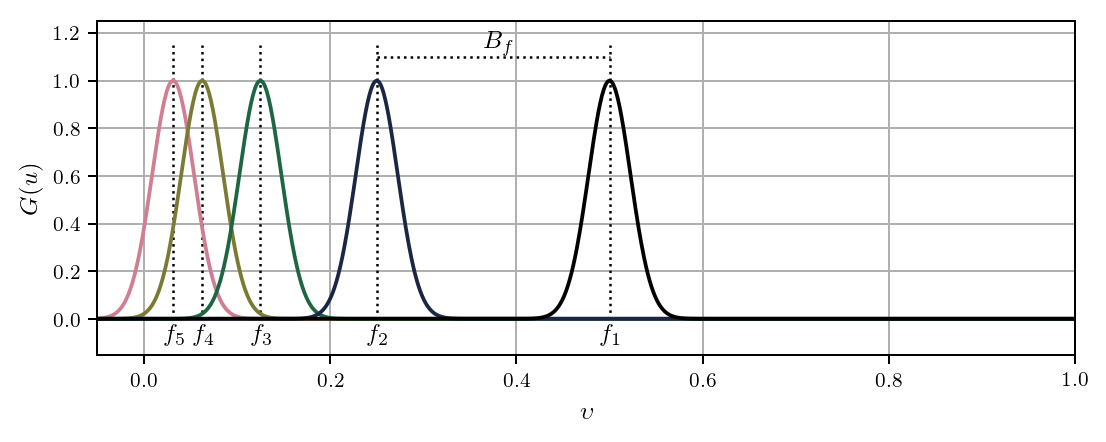

In [3]:
t = np.arange(-5, 5, 0.01)
u = np.arange(-1, 1, 0.001)

bandwidth = 1
k = 2 ** bandwidth
c1 = 0.2
gamma = (1/np.pi) * np.sqrt(np.log(1/c1)) * ((k+1)/(k-1))
f_high = 1/2.
f_low = 1/33.
           
frequencies = np.array([k**-ii * f_high for ii in range(20)], dtype=np.float)
frequencies = frequencies[f_low < frequencies][::-1]

c_vals = np.linspace(0, 0.6, len(frequencies)) 
colors = [cm.cubehelix(x) for x in c_vals][::-1]

plt.figure(figsize=set_size(width=width_pt, fraction=1., ratio=0.35), dpi=180)
# plt.plot(u, np.ones(len(u))*c1, color='k', linestyle='--', lw=1)
# plt.legend(('$c_1$',))
for ii, f in enumerate(frequencies):
    alpha = 0.1#f/gamma
    norm_const = np.sqrt(alpha**2/np.pi)

    gauss_t = np.exp(- alpha**2 * (t-t_0) **2)
    gt = gauss_t * np.exp(1j* 2 *np.pi * f * t)

    gauss_f = np.exp(- (np.pi/alpha)**2 * (u-f)**2)
    gf = gauss_f #* np.exp(-1j* 2*np.pi * (u-f) * t_0)
    gf *= np.sqrt(np.pi/alpha**2)

    gt_norm = gt * norm_const
    gf_norm = gf * norm_const
    
    plt.vlines(f, 0, 1.15, color='k', linestyle=':', lw=1)
    plt.text((f-0.01), -0.11, r'$f_%d$'%(len(frequencies)-ii), rotation=0)
#     plt.legend(('$c_1$',))
    
    print np.abs(gt_norm).sum(), np.abs(gf_norm).max()
    plt.plot(u, gf_norm.real, c=colors[ii])
    
plt.hlines(1.1, frequencies[-2], frequencies[-1], color='k', linestyle=':', label=r'$f$', lw=1)
plt.text((frequencies[-2]+((frequencies[-1]-frequencies[-2])/2.))-0.01, 1.12, r'$B_f$', rotation=0)

plt.grid()
plt.xlabel(r'$\upsilon$')
plt.ylabel(r'$G(u)$')
plt.xlim(-0.05, 1)
plt.ylim(-0.15, 1.25)

# plt.savefig(outdir + 'GaborFilterbank_freq_1d_octave_spacing.pdf', format='pdf', bbox_inches='tight')


\subsubsection{Frequency crossing point}

The fact that the bank filters have the same width at all frequencies is not a problem nor is it a requirement to analyze a signal with the Gabor function, however, making the filter width dependent on its frequency implies a multi-resolution analysis, since the filters behave like a scaled version of each other. One way to accomplish this, is to have the same relative window size in relation to the central frequency $f$. We must remember that window size of a Gabor function is denoted by the effective width of a Gaussian function, which in the time domain has a form of

\begin{equation}\label{eq:1d_gaussian_function_time}
    w(t)=e^{-\frac{(t-t_0)^2}{2\sigma^2}}
\end{equation}

A Gaussian window is infinite in extent, so it is characterized by its locality $t_0$ and its standard deviation $\sigma$, which in this context is implicit in the parameter $\alpha$ of th Gabor fuction, therefore, $\alpha^2 = 1 / 2 \sigma^2$. 
A peculiarity of the Gabor filter is that its analytical form in the frequency domain is completely defined by the fourier transform of the normalized Gaussian function.

\begin{equation}\label{eq:1d_gaussian_function_freq}
    G(\upsilon) = w(\upsilon) = e ^{-\left(\frac{\pi}{\alpha}\right) ^{2} (\upsilon-f)^2}
\end{equation}

Since the center frequencies of the bank filters are chosen to have a constant separation between them and the effective width of the window is a function of this central frequency, there is a point on the frequency axis where two adjacent functions intersect. In a filter bank with two functions with central frequencies $f_1$ and $f_2$, the low cut-off frequency of the function at $f_1$ coincides with the high cut-off frequency of the function at $f_2$. Normally in the literature this crossing point $c_1$, corresponds to the points where the Gabor function has decreased half of its maximum value, i.e., $c_1= 1/2=0.5$ \cite{Granlund:CGIP:1978}. However, we can obtain this crossing point $c_1$ by defining a frequency interval $\Delta f$ that represents the distance between the points where the function $G(\upsilon)$ begins to decrease, therefore, evaluating Eq. \eqref{eq:1d_gaussian_function_freq} at $\upsilon = f + \frac{\Delta f}{2}$:

\begin{equation}\label{eq:constant_crossing_point}
    G\left(f + \frac{\Delta f}{2}\right) = e^{-\left(\frac{\pi}{\alpha}\right)^2 \left(\frac{\Delta f}{2}\right)^2} = c_1 G(f) 
\end{equation}

we obtain the expression of the half-frequency interval 

\begin{equation}\label{eq:frequency_interval_crossing_point}
    \Delta f = \frac{2 \alpha}{\pi}\sqrt{\ln \left(\frac{1}{c_1}\right)}
\end{equation}

from which we obtain the crossing point defined as

\begin{equation}\label{eq:crossing_point}
    c_1 = e^{-\left(\frac{\alpha}{\pi} \right)^2 \left(\frac{\Delta f}{2}\right)^2 }
\end{equation}

Then, we know that for a filter whose center frequency is $f$ and whose cut-off frequencies interval is $\Delta f$, the full bandwidth expressed in octaves, $B_f$, is defined as \cite{Daugman:JOSA:1985a}

\begin{equation}\label{eq:frequency_bandwidth_interval}
    B_f = \log_2 \left( \frac{f + \frac{\Delta f}{2} }{f - \frac{\Delta f}{2}} \right)
\end{equation}

It is clear that using expression \eqref{eq:frequency_interval_crossing_point} in equation \eqref{eq:frequency_bandwidth_interval}, we find the expression that relates the frequency bandwidth to the central frequency and the effective width of the Gaussian window.

\begin{equation}\label{eq:frequency_bandwidth}
    B_f = \log_2 \left( \frac{ \frac{f}{\alpha} \pi + \sqrt{\ln \left(\frac{1}{c_1}\right)} }{ \frac{f}{\alpha} \pi - \sqrt{\ln \left(\frac{1}{c_1}\right)} } \right)
\end{equation}


The above analysis allows us to rewrite the expression of a Gabor filter in 1-d that belongs to a bank of filters spaced from each other by a bandwidth Bf and a center frequency f as follows. 

\begin{equation}\label{eq:gabor_function_1d_timefreq_bank}
    \begin{gathered}
         g(t) =  \frac{f}{\gamma \sqrt{\pi}} e ^{-\left(\frac{f}{\gamma}\right)^2 t^2} e ^{j 2 \pi f t } \\
         G(\upsilon) =  e ^{-\left(\frac{\gamma \pi}{f}\right) ^2 (\upsilon-f)^2}
     \end{gathered}
\end{equation}

where now the effective bandwidth $\alpha$ of each filter in the bank will be determined based on the ratio $\gamma = \frac{f}{\alpha}$ and crossing point between adjacent filters $c_1$.



21.894150721732476 0.999600826914781
42.170694530947415 0.999600826914781
73.37582923190459 0.9999999999999999
97.38189479649844 0.9999999999999999
99.9991292590424 0.9999999999999999


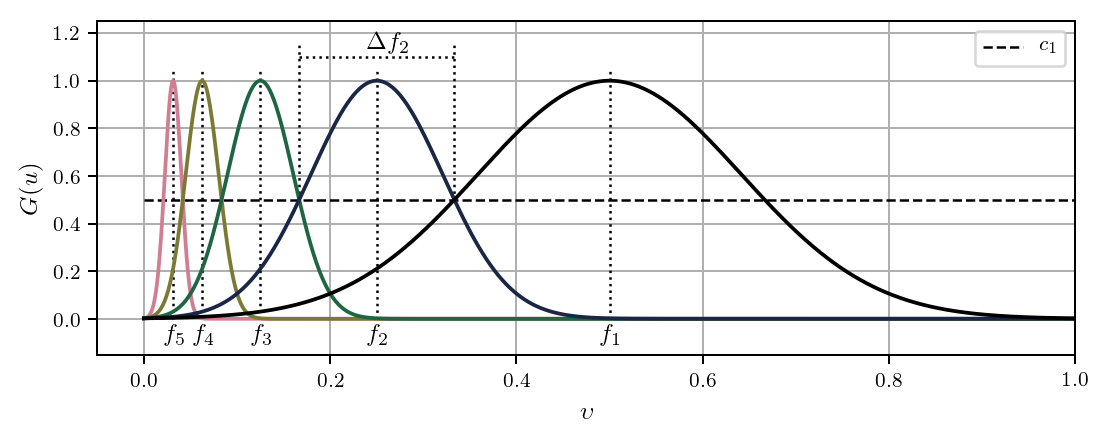

In [4]:
t = np.arange(-5, 5, 0.01)
u = np.arange(0, 1, 0.001)

bandwidth = 1.
k = 2 ** bandwidth
c1 = 0.5
gamma = (1/np.pi) * np.sqrt(np.log(1/c1)) * ((k+1)/(k-1))
f_high = 1/2.
f_low = 1/33.
           
frequencies = np.array([k**-ii * f_high for ii in range(20)], dtype=np.float)
frequencies = frequencies[f_low < frequencies][::-1]

central_freq = frequencies[-2]
delta_f = central_freq * ((k-1)/(k+1))
freq_pos = central_freq + delta_f 
freq_neg = central_freq - delta_f 

c_vals = np.linspace(0, 0.6, len(frequencies)) 
colors = [cm.cubehelix(x) for x in c_vals][::-1]

plt.figure(figsize=set_size(width=width_pt, fraction=1., ratio=0.35), dpi=180)
plt.plot(u, np.ones(len(u))*c1, color='k', linestyle='--', lw=1)
plt.legend(('$c_1$',))
for ii, f in enumerate(frequencies):
    alpha = f/gamma
    norm_const = np.sqrt(alpha**2/np.pi)

    gauss_t = np.exp(- alpha**2 * (t-t_0) **2)
    gt = gauss_t * np.exp(1j* 2 *np.pi * f * t)

    gauss_f = np.exp(- (np.pi/alpha)**2 * (u-f)**2)
    gf = gauss_f #* np.exp(-1j* 2*np.pi * (u-f) * t_0)
    gf *= np.sqrt(np.pi/alpha**2)

    gt_norm = gt * norm_const
    gf_norm = gf * norm_const
    
    print np.abs(gt_norm).sum(), np.abs(gf_norm).max()
    
    plt.vlines(f, 0, 1.05, color='k', linestyle=':', lw=1)
    plt.text((f-0.01), -0.11, r'$f_%d$'%(len(frequencies)-ii), rotation=0)
    plt.plot(u, gf_norm.real, c=colors[ii])

plt.text((central_freq)-0.01, 1.12, r'$\Delta f_2$', rotation=0)
plt.hlines(1.1, freq_neg, freq_pos, color='k', linestyle=':', label=r'$f$', lw=1)
plt.vlines(freq_pos, c1, 1.15, color='k', linestyle=':', lw=1)
plt.vlines(freq_neg, c1, 1.15, color='k', linestyle=':', lw=1)

plt.grid()
plt.xlabel(r'$\upsilon$')
plt.ylabel(r'$G(u)$')
plt.xlim(-0.05, 1)
plt.ylim(-0.15, 1.25)


# plt.savefig(outdir + 'GaborFilterbank_freq_1d_half_crossingpoint.pdf', format='pdf', bbox_inches='tight')



52.40883074282217 0.99993931418444
84.60699274073178 0.9999393141844398
99.5649562206865 0.9999999999999999
99.99999882343147 0.9999999999999999
100.00000000000212 0.9999999999999999


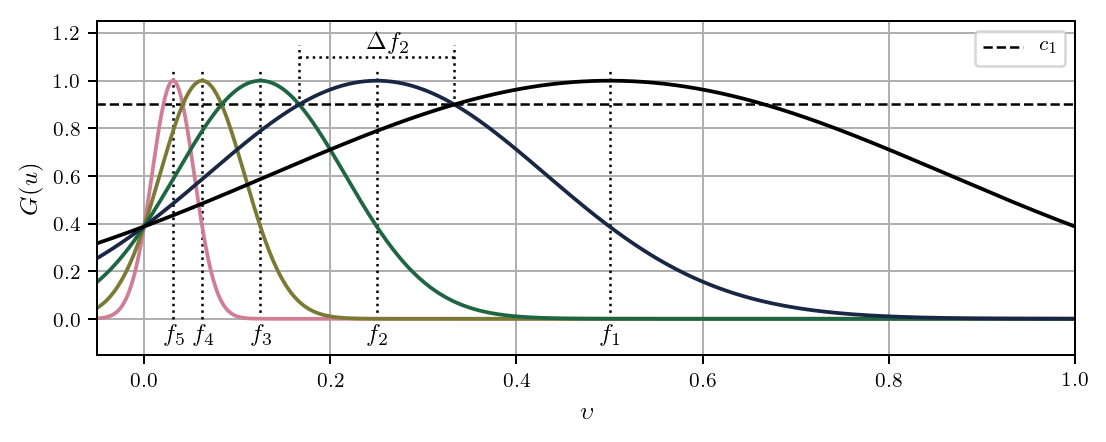

In [5]:
t = np.arange(-5, 5, 0.01)
u = np.arange(-1, 1, 0.001)

bandwidth = 1.
k = 2 ** bandwidth
c1 = 0.9
gamma = (1/np.pi) * np.sqrt(np.log(1/c1)) * ((k+1)/(k-1))
f_high = 1/2.
f_low = 1/33.
           
frequencies = np.array([k**-ii * f_high for ii in range(20)], dtype=np.float)
frequencies = frequencies[f_low < frequencies][::-1]

central_freq = frequencies[-2]
delta_f = central_freq * ((k-1)/(k+1))
freq_pos = central_freq + delta_f 
freq_neg = central_freq - delta_f 

c_vals = np.linspace(0, 0.6, len(frequencies)) 
colors = [cm.cubehelix(x) for x in c_vals][::-1]

plt.figure(figsize=set_size(width=width_pt, fraction=1., ratio=0.35), dpi=180)
plt.plot(u, np.ones(len(u))*c1, color='k', linestyle='--', lw=1)
plt.legend(('$c_1$',))
for ii, f in enumerate(frequencies):
    alpha = f/gamma
    norm_const = np.sqrt(alpha**2/np.pi)

    gauss_t = np.exp(- alpha**2 * (t-t_0) **2)
    gt = gauss_t * np.exp(1j* 2 *np.pi * f * t)

    gauss_f = np.exp(- (np.pi/alpha)**2 * (u-f)**2)
    gf = gauss_f #* np.exp(-1j* 2*np.pi * (u-f) * t_0)
    gf *= np.sqrt(np.pi/alpha**2)

    gt_norm = gt * norm_const
    gf_norm = gf * norm_const
    
    print np.abs(gt_norm).sum(), np.abs(gf_norm).max()
    
    plt.vlines(f, 0, 1.05, color='k', linestyle=':', label=r'$f$', lw=1)
    plt.text((f-0.01), -0.11, r'$f_%d$'%(len(frequencies)-ii), rotation=0)
    
    plt.plot(u, gf_norm.real, c=colors[ii])

plt.text((central_freq)-0.01, 1.12, r'$\Delta f_2$', rotation=0)
plt.hlines(1.1, freq_neg, freq_pos, color='k', linestyle=':', label=r'$f$', lw=1)
plt.vlines(freq_pos, c1, 1.15, color='k', linestyle=':', lw=1)
plt.vlines(freq_neg, c1, 1.15, color='k', linestyle=':', lw=1)

plt.grid()
plt.xlabel(r'$\upsilon$')
plt.ylabel(r'$G(u)$')
plt.xlim(-0.05, 1)
plt.ylim(-0.15, 1.25)


# plt.savefig(outdir + 'GaborFilterbank_freq_1d_new_crossingpoint.pdf', format='pdf', bbox_inches='tight')

# References

[<a id="cit-Gabor:JIEE:1946a" href="#call-Gabor:JIEE:1946a">1</a>] Gabor D., ``_Theory of Communication. Part 1: The Analysis of Information_'', Journal of the Institution of Electrical Engineers - Part III: Radio and Communication Engineering, vol. 93, number 26, pp. 429--441, November 1946.

[<a id="cit-Bracewell:FourierBook:1999" href="#call-Bracewell:FourierBook:1999">2</a>] Ronald N. Bracewell, ``_The Fourier Transform and Its Applications_'', July 1999.

[<a id="cit-Granlund:CGIP:1978" href="#call-Granlund:CGIP:1978">3</a>] Granlund Goesta H., ``_In Search of a General Picture Processing Operator_'', Computer Graphics and Image Processing, vol. 8, number 2, pp. 155--173, October 1978.

[<a id="cit-Daugman:JOSA:1985a" href="#call-Daugman:JOSA:1985a">4</a>] Daugman John G., ``_Uncertainty Relation for Resolution in Space, Spatial Frequency, and Orientation Optimized by Two-Dimensional Visual Cortical Filters_'', JOSAA, vol. 2, number 7, pp. 1160--1169, July 1985.

